In [1]:
import sys
import numpy as np
from numpy import linalg

print(f'Python: {sys.version}')
print(f'NumPy: {np.__version__}')

Python: 3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
NumPy: 1.14.3


In [2]:
# define an array
A = np.arange(9) - 3; A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [3]:
B = A.reshape((3,3)); B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [4]:
# eucledian L2 norm - default
linalg.norm(A), linalg.norm(B)

(8.306623862918075, 8.306623862918075)

In [5]:
# Frobenius norm - L2 norm
linalg.norm(B,'fro')

8.306623862918075

In [6]:
# the max norm
linalg.norm(A, np.inf), linalg.norm(B, np.inf)

(5.0, 12.0)

In [7]:
# vector normalization - normalization to produce a unit vector
norm = linalg.norm(A)
A_unit = A/norm
print(A_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [8]:
# checking - the magnitude of unit vector = 1
linalg.norm(A_unit)

1.0

## Eigendecomposition

In [9]:
# find the eigenvalues and eigenvectors for a square matrix
A = np.diag(np.arange(1,4));A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [10]:
eigenvalues, eigenvectors = linalg.eig(A)

In [11]:
eigenvalues

array([1., 2., 3.])

In [12]:
# each column is an eigenvector
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [13]:
# the eigenvalue w(i) corresponds to the eigenvector v[i,i]
print(f'Eigenvalue: {eigenvalues[1]}')
print(f'Eigenvector: {eigenvectors[:,1]}')

Eigenvalue: 2.0
Eigenvector: [0. 1. 0.]


In [15]:
np.diag(eigenvalues)

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [16]:
linalg.inv(eigenvectors)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Check that the Eigendecomposition is correct by applying its formula<br>
<img src="https://latex.codecogs.com/gif.latex?A&space;=&space;V&space;diag(\lambda)V^{-1}" title="Eigendecomposition" /><br>
where `matrix` = <img src="https://latex.codecogs.com/gif.latex?diag(\lambda)V^{-1}" title="diag(\lambda)V^{-1}" /> and <br>
`output` = **V**\*`matrix`

In [18]:
# checking whether it is right by applying the eigendecomposition formula
matrix = np.matmul(np.diag(eigenvalues), np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix)
output

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

In [22]:
# import necessary matplotlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

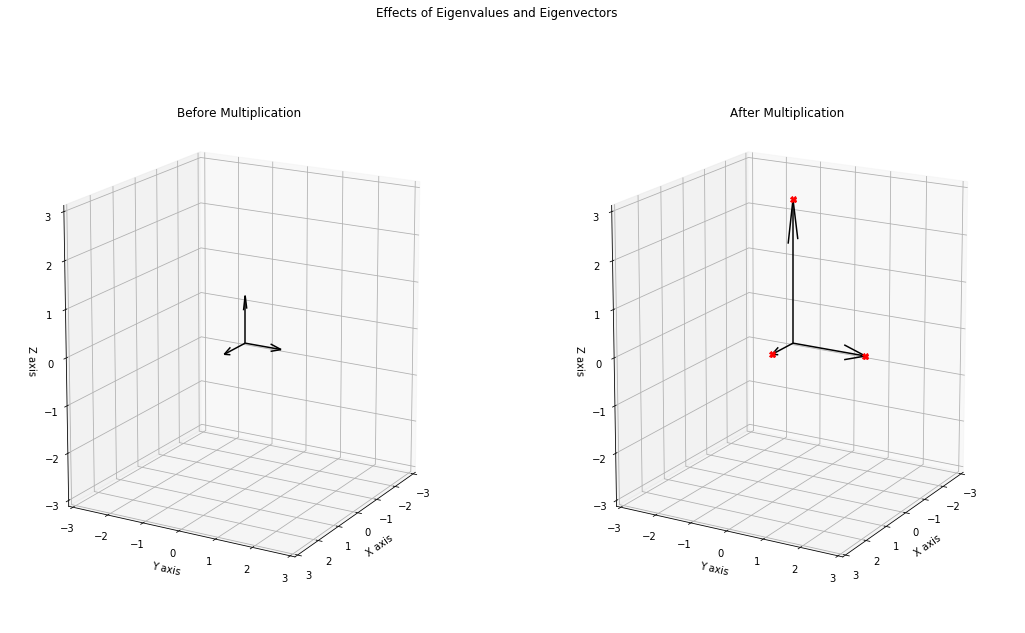

In [27]:
# plot the igenvectors
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of Eigenvalues and Eigenvectors')

# first subplot - before multiplication
ax1 = fig.add_subplot(121, projection='3d')
ax1.quiver(origin,origin,origin, 
           eigenvectors[0,:], eigenvectors[1,:],eigenvectors[2,:],
           color = 'k')
ax1.set_xlim([-3,3])
ax1.set_ylim([-3,3])
ax1.set_zlim([-3,3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15,30)
ax1.set_title('Before Multiplication')

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)

# second subplot - new eigenvectors
ax2 = fig.add_subplot(122, projection='3d')
ax2.quiver(origin,origin,origin, 
           new_eig[0,:], new_eig[1,:],new_eig[2,:],
           color = 'k')

# add the eigenvalues to the plot
ax2.plot((eigenvalues[0]*eigenvectors[0]),
         (eigenvalues[1]*eigenvectors[1]),
         (eigenvalues[2]*eigenvectors[2]),
         'rX')
ax2.set_xlim([-3,3])
ax2.set_ylim([-3,3])
ax2.set_zlim([-3,3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15,30)
ax2.set_title('After Multiplication')

#show the plot
plt.show()